## Example 2: Challenges in Identifiability

Here we will explore inference when there is not a single unique set of parameters.

In [1]:
import sys
import os

# Add repo root to Python path (one level up from examples/)
sys.path.append(os.path.abspath(".."))  

from src.parsing import *
from CRN_Simulation.CRN import CRN

import numpy as np
import random

In [2]:
# Determine Stochiometric, Reactant and names of reactions
species_names = ["X1", "X2"]

# Define complexes (example: bi-molecular)
complexes = np.array([[0, 0, 0, 1, 1, 2],
                      [0, 1, 2, 0, 1, 0]])

reactant_matrix, product_matrix, stoichiometric_matrix, reaction_names, parameter_names = generate_reactions(complexes, species_names)
print(f"Total reactions generated: {len(reaction_names)}")
print("Some reaction names:", reaction_names[:5])

Total reactions generated: 30
Some reaction names: ['Empty_to_X2:', 'Empty_to_2X2:', 'Empty_to_X1:', 'Empty_to_X1+X2:', 'Empty_to_2X1:']


In [3]:
##########################
# Set up Reaction System #
##########################

selected_rxns  = ["Empty_to_X1", "X1_to_2X1","X1+X2_to_X2"]
selected_rates = [1.0, 1.0,0.1]  # "Empty_to_X1", "X1_to_2X1","X2+X1_to_X2"


(CRN_stoichiometric_matrix,
CRN_reaction_names,
 CRN_parameter_names,
 CRN_propensities,
 CRN_parameter_values,
 CRN_indices) = build_subCRN_from_names(
    reactant_matrix,
    product_matrix,
    stoichiometric_matrix,
    reaction_names,
    parameter_names,
    species_names,
    selected_names=selected_rxns,
    rates=selected_rates
)

rn = CRN(
    species_names=species_names,
    stoichiometric_matrix=CRN_stoichiometric_matrix,
    parameters_names=CRN_parameter_names,
    reaction_names=CRN_reaction_names,
    propensities=CRN_propensities
)

print("CRN created.")
print("Reaction indices:", CRN_indices)
print("Parameter values:", CRN_parameter_values)

CRN created.
Reaction indices: [2, 19, 21]
Parameter values: {'k2': 1.0, 'k19': 1.0, 'k21': 0.1}


Initial state: {'X1': np.int64(0), 'X2': np.int64(5)}
Trajectory saved to ../data/example2_trajectory.json
CRN trajectory saved to ../data/example2_trajectory.json


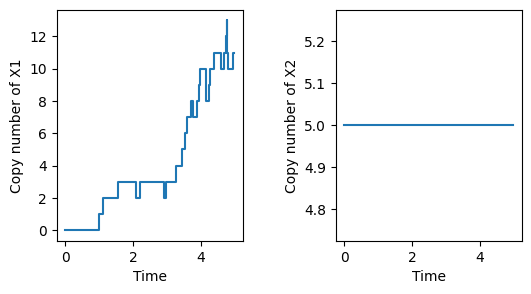

In [4]:
data_dir = "../data"  # relative to examples/ folder
os.makedirs(data_dir, exist_ok=True)

###############################
# Generate trajectory for CRN #
###############################
# Example: 2D species, X1 starts at 0, X2 starts at 10
species_min = [0, 5]
species_max = [0, 5]

time_list, state_list = generate_single_trajectory(
    rn,
    CRN_parameter_values,
    species_names,
    finalTime=5,   # adjust as needed
    minVal=species_min,
    maxVal=species_max,
    seed=42          # for reproducibility
)

trajectory_file = os.path.join(data_dir, "example2_trajectory.json")
save_trajectory(time_list, state_list, filename=trajectory_file)
print(f"CRN trajectory saved to {trajectory_file}")

In [5]:
# Parse trajectory for CRN1
[col_dict, XCurrKeys, X_Counts, T_Vals, X_Propensities] = \
    calc_XCurr_ChangeTimePropensitySimple(
        state_list,
        time_list,
        reactant_matrix,
        stoichiometric_matrix
    )

# Print some basic info to check
print(f"CRN: {len(XCurrKeys)} unique states observed")

Wrapped single trajectory into list of trajectories.
Tracking data for 18 unique stoichiometric changes
Processing trajectory 1 of 1
	Processing state 0 of 30
Finished processing states. Computing propensities...
	Processing propensities for state 0 = (0, 5)
Finished successfully.
CRN: 14 unique states observed


In [6]:
XCurrKeys

[(0, 5),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (5, 5),
 (6, 5),
 (7, 5),
 (8, 5),
 (9, 5),
 (10, 5),
 (11, 5),
 (12, 5),
 (13, 5)]